# Customer Preference Analysis 

## Analyze relationship between cuisine & rating

In [1]:
import pandas as pd
df = pd.read_csv('Dataset .csv')

# Extract first cuisine as main cuisine
df['Main Cuisine'] = df['Cuisines'].apply(lambda x: str(x).split(',')[0].strip() if pd.notnull(x) else 'Unknown')

print("\nTop 10 most common cuisines:")
display(df['Main Cuisine'].value_counts().head(10))


Top 10 most common cuisines:


Main Cuisine
North Indian    2992
Chinese          855
Fast Food        672
Bakery           621
Cafe             617
American         278
South Indian     262
Mithai           246
Street Food      236
Continental      235
Name: count, dtype: int64

## Average rating per cuisine

In [2]:
# Use only rated restaurants
rated_df = df[df['Aggregate rating'] > 0]

# Group by cuisine
avg_rating_by_cuisine = rated_df.groupby('Main Cuisine')['Aggregate rating'].mean().sort_values(ascending=False)

print("\nAverage rating per cuisine:")
display(avg_rating_by_cuisine.head(10))


Average rating per cuisine:


Main Cuisine
Sunda            4.900000
Scottish         4.700000
Cajun            4.700000
Taiwanese        4.650000
Filipino         4.616667
Persian          4.600000
Ramen            4.600000
World Cuisine    4.500000
Argentine        4.500000
Hawaiian         4.480000
Name: Aggregate rating, dtype: float64

##  Plot

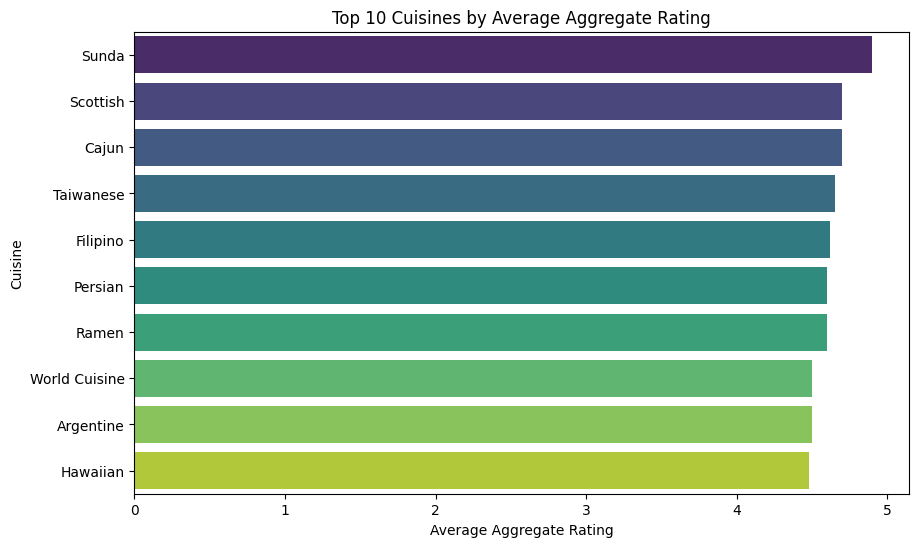

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(
    x=avg_rating_by_cuisine.head(10).values, 
    y=avg_rating_by_cuisine.head(10).index, 
    hue=avg_rating_by_cuisine.head(10).index,
    palette='viridis',
    legend=False
)
plt.title('Top 10 Cuisines by Average Aggregate Rating')
plt.xlabel('Average Aggregate Rating')
plt.ylabel('Cuisine')
plt.show()


## Most popular cuisines based on vote

In [4]:
votes_by_cuisine = rated_df.groupby('Main Cuisine')['Votes'].sum().sort_values(ascending=False)

print("\nTop 10 cuisines by total votes:")
print(votes_by_cuisine.head(10))



Top 10 cuisines by total votes:
Main Cuisine
North Indian    356030
Cafe            116504
American        105437
Italian          95145
Continental      94554
Chinese          84744
European         45838
Fast Food        42441
Bakery           41837
Pizza            36373
Name: Votes, dtype: int64


## Plot:

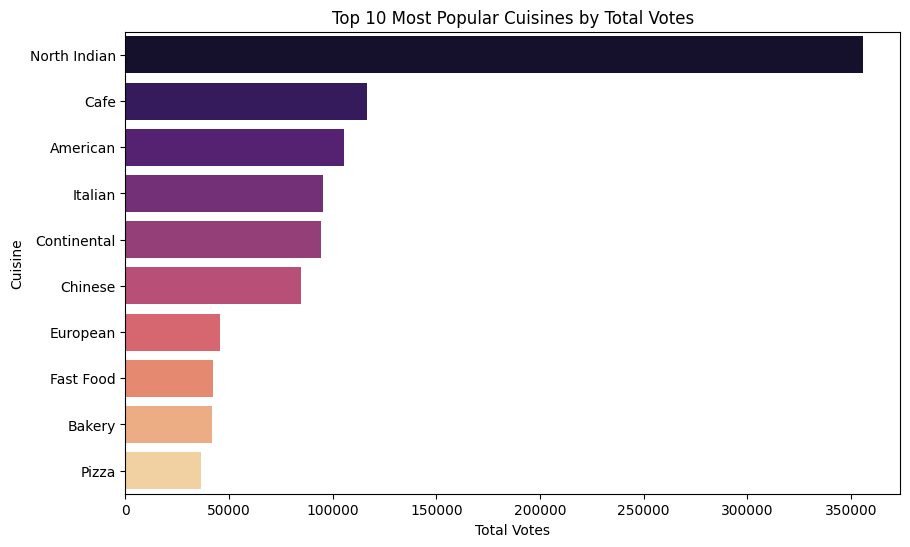

In [5]:
plt.figure(figsize=(10,6))
sns.barplot(x=votes_by_cuisine.head(10).values, 
            y=votes_by_cuisine.head(10).index,
            hue=votes_by_cuisine.head(10).index,
            
            palette='magma',
           legend=False)
plt.title('Top 10 Most Popular Cuisines by Total Votes')
plt.xlabel('Total Votes')
plt.ylabel('Cuisine')
plt.show()
